In [ ]:
from  datasets_dgl.data_dgl import *
from  easydict  import EasyDict
from  datasets_dgl.utils import to_scipy

torch.cuda.set_device(2)  # 指第几块GPU

# pubmed 攻击用的是meta_self所以攻击test多
dataset_name = 'Attack-Cora_ML'
attack    = 'Meta_Self-0.25'

################# no attack
DATASET0 = EasyDict()
DATASET0.ATTACK = {
    "data":dataset_name,
    "attack":attack.split('-')[0],
    "ptb_rate":attack.split('-')[1]
}
dataset  = load_attack_data(DATASET0['ATTACK'])
graph = dataset.graph
# graph = dgl.remove_self_loop(graph) # 如果不可视化自环的话就用
graph

In [ ]:
idx_val   = graph.ndata['val_mask'].nonzero().squeeze()
idx_test  = graph.ndata['test_mask'].nonzero().squeeze()
idx_train = graph.ndata['train_mask'].nonzero().squeeze()

idx_mask = torch.cat((idx_test, idx_val))
idx_keep = idx_train

In [9]:
# Disorder Reconstruction Scores
import math
keep_Disorder_Score = 1.0
mask_Disorder_Score = 0.1
lamda = 0.6

def compute_Disorder_Reconstruction_Scores(keep_Disorder_Score, mask_Disorder_Score, lamda):
    if keep_Disorder_Score != 0:
        return math.exp(-(lamda * (keep_Disorder_Score)/(mask_Disorder_Score + 1e-5)))
    else:
        return mask_Disorder_Score

# 如果不可区分，乘10
compute_Disorder_Reconstruction_Scores(keep_Disorder_Score, mask_Disorder_Score, lamda)

0.002480239725437491

In [206]:
# compute avg std
import numpy as np 
arr = [0.5729,0.5895,0.5960]
 
# 求均值
arr_mean = np.mean(arr)
 
# 求总体标准差
arr_std_1 = np.std(arr)

print(arr_mean)
print(arr_std_1)

0.5861333333333333
0.009726367370309555


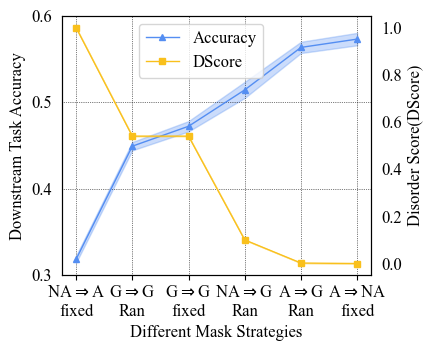

In [13]:
# Cora meta 0.25

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
plt.style.use('default') # 风格设置默认即可，要不是全黑

fontsize = 12
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rc('font', family='Times New Roman')


def plot_data(ax, data, label, color, marker):
    data = np.array(data)
    avg = data[0]
    std = data[1]
    x_axis = np.linspace(1, len(avg), len(avg))

    r1 = list(map(lambda x: x[0] - x[1], zip(avg, std)))  # up std
    r2 = list(map(lambda x: x[0] + x[1], zip(avg, std)))  # down std
    line = ax.plot(x_axis, avg, label=label, linewidth=1.0, c=color, marker=marker, markersize=4.5)
    ax.fill_between(x_axis, r1, r2, alpha=0.3, color=color)
    return line



color_list = ['#548EF2', '#F9C01C']  # 浅蓝和浅黄
#            NA->A fixed            random/random       random/fixed      NA-> random     A-> random          A->NA fixed
#            test->train /fixed     random/random       random/fixed      test->/random   train->/random      train->test/fixed
acc        = [[0.3185,              0.4493,             0.4723,           0.5144,         0.5635,             0.5731 ],           [0.004,  0.0048,   0.006,   0.0093,  0.0065,  0.0072]]
# Disorder Reconstruction Scores
DScore     = [[1.0,                 0.54,               0.54,             0.1,            0.002,              0.0   ],            [0.,   0.,     0.,    0.,    0.,    0.]]



fig = plt.figure(figsize=(3.99, 3.37))
# acc
ax1 = fig.add_subplot(1, 1, 1)
acc_line = plot_data(ax1, acc, label='Accuracy', color=color_list[0], marker='^')
plt.yticks([0.3, 0.4, 0.5, 0.6])
ax1.grid(color='black', linewidth=0.5, axis='both', linestyle=':')
ax1.set_xlabel("Different Mask Strategies", fontsize=fontsize)
ax1.set_ylabel("Downstream Task Accuracy" , fontsize=fontsize)

# DRS
ax2 = ax1.twinx()
DRScore_line = plot_data(ax2, DScore, label='DScore', color=color_list[1], marker='s')
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xticks([i+1 for i in range(6)], ['NA$\Rightarrow$A\nfixed','G$\Rightarrow$G\nRan','G$\Rightarrow$G\nfixed', 'NA$\Rightarrow$G \nRan','A$\Rightarrow$G\nRan','A$\Rightarrow$NA\nfixed']) #把坐标轴变成自己想要的样子
ax2.set_ylabel("Disorder Score(DScore)", fontsize=fontsize)


ax1.tick_params(bottom=True,  top=False, left=False, right=False) # 控制是否出头
ax2.tick_params(bottom=False, top=False, left=False, right=False)

lns = acc_line + DRScore_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper center', fontsize=fontsize, bbox_to_anchor=(0.45, 1.0))

# plt.savefig('./save_exp_record/GraphMAE2_analyze_Meta_Self_cora_0.25.pdf', bbox_inches='tight', pad_inches=0.0)

plt.show()

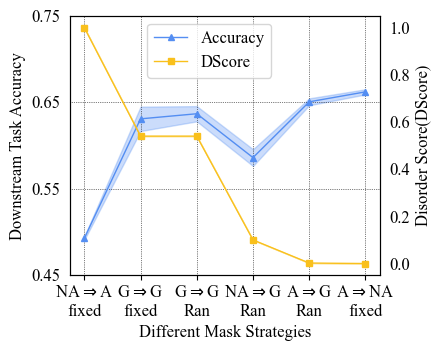

In [14]:
# Citeseer meta 0.25

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
plt.style.use('default') # 风格设置默认即可，要不是全黑

fontsize = 12
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rc('font', family='Times New Roman')


def plot_data(ax, data, label, color, marker):
    data = np.array(data)
    avg = data[0]
    std = data[1]
    x_axis = np.linspace(1, len(avg), len(avg))

    r1 = list(map(lambda x: x[0] - x[1], zip(avg, std)))  # up std
    r2 = list(map(lambda x: x[0] + x[1], zip(avg, std)))  # down std
    line = ax.plot(x_axis, avg, label=label, linewidth=1.0, c=color, marker=marker, markersize=4.5)
    ax.fill_between(x_axis, r1, r2, alpha=0.3, color=color)
    return line



color_list = ['#548EF2', '#F9C01C']  # 浅蓝和浅黄

#            NA->A fixed            random/fixed        random/random      NA-> random     A-> random          A->NA fixed
#            test->train /fixed     random/fixed        random/random      test->/random   train->/random      train->test/fixed
acc        = [[0.4929,              0.6309,             0.6368,            0.5861,         0.6506,             0.6621],            [0.0019,  0.0141,  0.0088,  0.0097, 0.0040, 0.0030]]
# Disorder Reconstruction Scores
DScore     = [[1.0,                 0.54,               0.54,              0.1,            0.002,              0.0   ],            [0.,      0.,      0.,      0.,     0.,     0.]]



fig = plt.figure(figsize=(3.99, 3.37))
# acc
ax1 = fig.add_subplot(1, 1, 1)
acc_line = plot_data(ax1, acc, label='Accuracy', color=color_list[0], marker='^')
plt.yticks([0.45, 0.55, 0.65, 0.75])
ax1.grid(color='black', linewidth=0.5, axis='both', linestyle=':')
ax1.set_xlabel("Different Mask Strategies", fontsize=fontsize)
ax1.set_ylabel("Downstream Task Accuracy" , fontsize=fontsize)

# DRS
ax2 = ax1.twinx()
DRScore_line = plot_data(ax2, DScore, label='DScore', color=color_list[1], marker='s')
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xticks([i+1 for i in range(6)], ['NA$\Rightarrow$A\nfixed','G$\Rightarrow$G\nfixed', 'G$\Rightarrow$G\nRan','NA$\Rightarrow$G \nRan', 'A$\Rightarrow$G\nRan', 'A$\Rightarrow$NA\nfixed']) 
ax2.set_ylabel("Disorder Score(DScore)", fontsize=fontsize)


ax1.tick_params(bottom=True, top=False, left=False, right=False) # 控制是否出头
ax2.tick_params(bottom=False, top=False, left=False, right=False)

lns = acc_line + DRScore_line
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper center', fontsize=fontsize, bbox_to_anchor=(0.45, 1.0))

# plt.savefig('./save_exp_record/GraphMAE2_analyze_Meta_Self_citeseer_0.25.pdf', bbox_inches='tight', pad_inches=0.0)

plt.show()